In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")

In [3]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
null_values = data.isna().sum().sum()
print("Total Null Values are : ",null_values)

Total Null Values are :  0


Explorative Data Analysis

In [5]:
data_eda = data.copy()

In [6]:
#Replacing column numberical to text for eda
data_eda['SEX'] = data_eda['SEX'].replace({1:'Male',2:'Female'})
data_eda['EDUCATION'] = data_eda['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others',5:'Others',6:'Others',0:'Others'})
data_eda['MARRIAGE'] = data_eda['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others',0:'Others'})
data_eda['default.payment.next.month'] = data_eda['default.payment.next.month'].replace({1:'Yes',0:'No'})

In [7]:
data_eda

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,No
29996,29997,150000.0,Male,High School,Single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,No
29997,29998,30000.0,Male,University,Single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Yes
29998,29999,80000.0,Male,High School,Married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


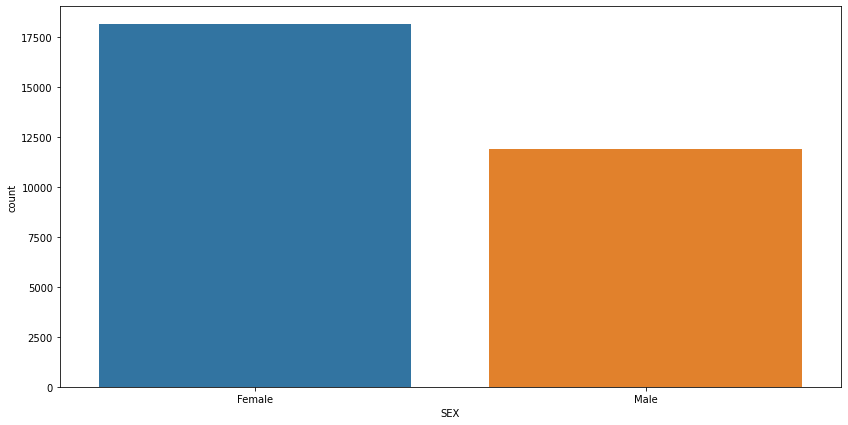

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


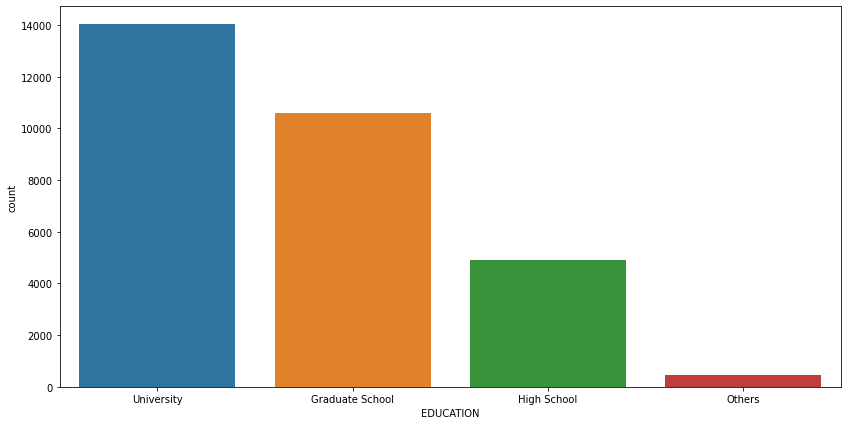

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


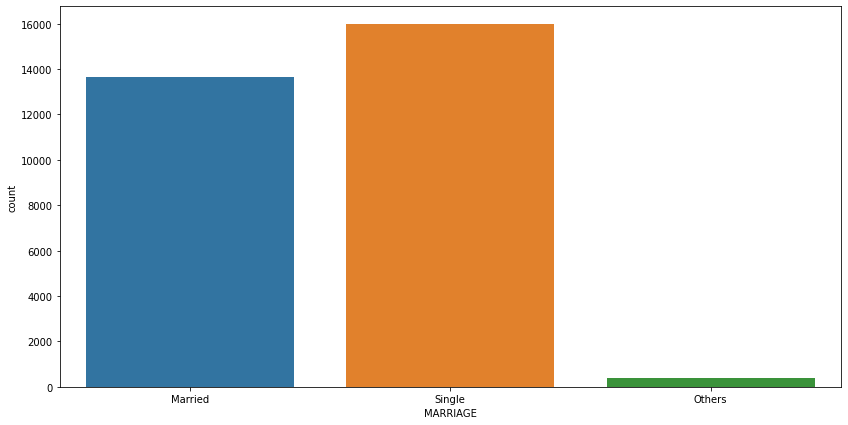

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


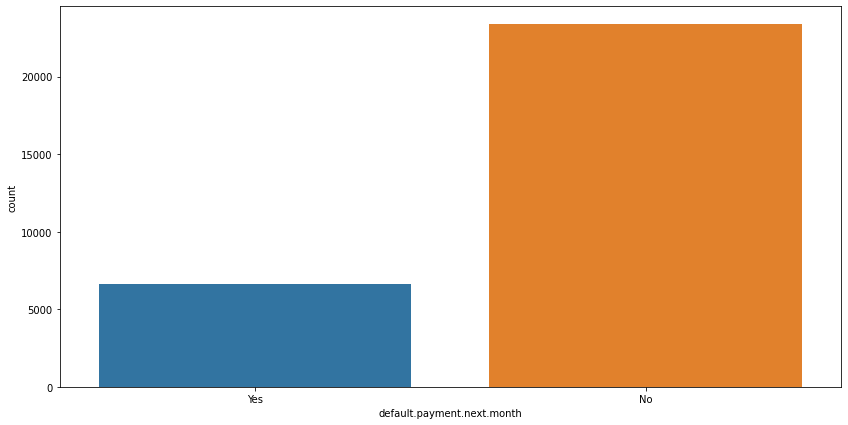

In [8]:
for column in data_eda.columns:
    if data_eda[column].dtype == object:
        plt.figure(figsize=(14,7))
        sns.countplot(data_eda[column])
        plt.show()

In [9]:
data_eda.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


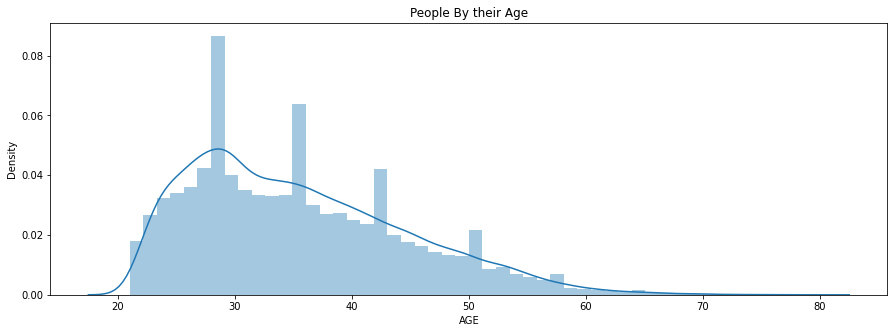

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(data_eda['AGE'])
plt.title("People By their Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


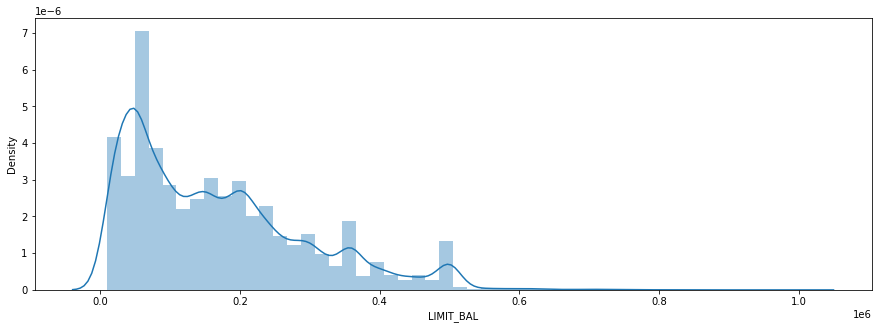

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(data_eda['LIMIT_BAL'])
plt.show()

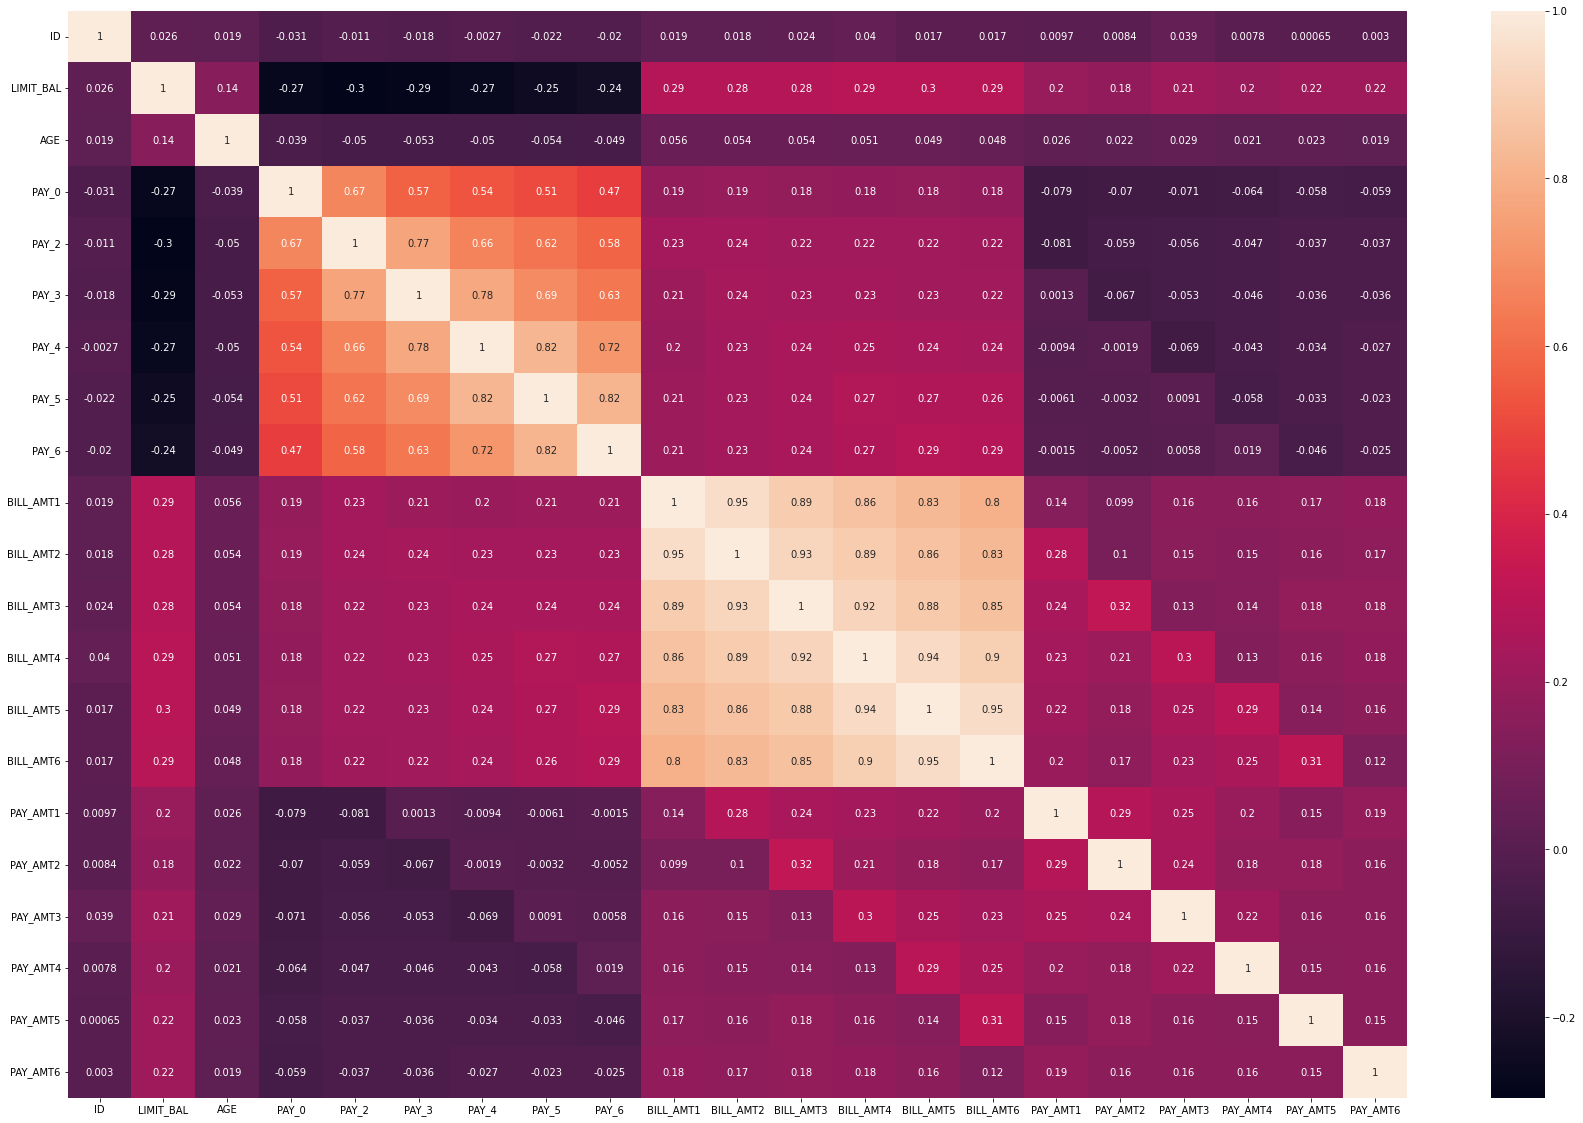

In [12]:
plt.subplots(figsize=(30,20))
sns.heatmap(data_eda.corr(),annot=True)

In [13]:
Y = data['default.payment.next.month']

In [14]:
X = data.drop(columns=['default.payment.next.month'])

Train & Testing Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=10)

Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
model1 = LogisticRegression()

In [19]:
model1_Name = "Logistic Regression"

In [20]:
model1.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred = model1.predict(x_test)

In [22]:
model1_AccuracyScore = accuracy_score(y_pred,y_test)*100

In [23]:
print("Accuracy Score of the {} is --> {}".format(model1_Name,model1_AccuracyScore))

Accuracy Score of the Logistic Regression is --> 77.56666666666666


<Figure size 720x720 with 0 Axes>

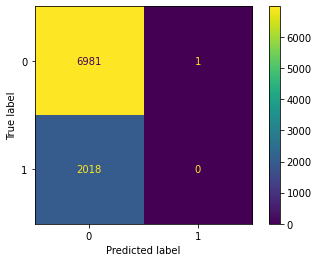

In [24]:
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [25]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.78      0.87      8999\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.78      9000\n   macro avg       0.50      0.39      0.44      9000\nweighted avg       1.00      0.78      0.87      9000\n'

K Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model2 = KNeighborsClassifier()

In [28]:
model2_name = "K Neighbors Classifier"

In [29]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred = model2.predict(x_test)

In [31]:
model2_AccuracyScore = accuracy_score(y_pred,y_test)*100

In [32]:
print("Accuracy Score of the {} is --> {}".format(model2_name,model2_AccuracyScore))

Accuracy Score of the K Neighbors Classifier is --> 74.35555555555555


Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model3=DecisionTreeClassifier()
#fitting the model

model3.fit(x_train,y_train)

y_pred=model3.predict(x_test)

In [35]:
model3_name = "DecisionTree Classifier"

In [36]:
model3_AccuracyScore = accuracy_score(y_pred,y_test)*100

In [37]:
print("Accuracy Score of the {} is --> {}".format(model3_name,model3_AccuracyScore))

Accuracy Score of the DecisionTree Classifier is --> 71.9888888888889


Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model4=RandomForestClassifier(max_depth=10,n_estimators=250,random_state=134)

model4.fit(x_train,y_train)


y_pred=model4.predict(x_test)

In [40]:
model4_name = "RandomForest Classifier"

In [41]:
model4_AccuracyScore = accuracy_score(y_pred,y_test)*100
print("Accuracy Score of the {} is --> {}".format(model4_name,model4_AccuracyScore))

Accuracy Score of the RandomForest Classifier is --> 82.03333333333333


Support Vector Machine

In [42]:
from sklearn import svm
model5 = svm.SVC(kernel='rbf', gamma='scale')

In [43]:
#fitting & Predicting model
model5.fit(x_train, y_train)

ypred = model5.predict(x_test)

In [44]:
model5_name = "Support Vector Classifier"


In [45]:
model5_AccuracyScore = accuracy_score(y_pred,y_test)*100

In [46]:
print("Accuracy Score of the {} is --> {}".format(model5_name,model5_AccuracyScore))

Accuracy Score of the Support Vector Classifier is --> 82.03333333333333


ADA BOOST

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
model6=AdaBoostClassifier(n_estimators=150,random_state=10)
#fitting & predicting the model
model6.fit(x_train,y_train)

y_pred=model6.predict(x_test)

In [49]:
model6_name = "Ada Boost Classifier"

In [50]:
model6_AccuracyScore = accuracy_score(y_pred,y_test)*100
print("Accuracy Score of the {} is --> {}".format(model6_name,model6_AccuracyScore))

Accuracy Score of the Ada Boost Classifier is --> 82.0


Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# Fitting the model & predicting the target value
model7 = GradientBoostingClassifier()
model7.fit(x_train,y_train)

y_pred=model7.predict(x_test)

In [53]:
model7_name = "Gradient Boost Classifier"

In [54]:
model7_AccuracyScore = accuracy_score(y_pred,y_test)*100
print("Accuracy Score of the {} is --> {}".format(model7_name,model7_AccuracyScore))

Accuracy Score of the Gradient Boost Classifier is --> 82.0111111111111


In [55]:
model1_AccuracyScore

77.56666666666666

Finding the best Model

In [56]:
print("{}, Score is {}".format(model1_Name,model1_AccuracyScore))

print("{}, Score is {}".format(model2_name,model2_AccuracyScore))
print("{}, Score is {}".format(model3_name,model3_AccuracyScore))
print("{}, Score is {}".format(model4_name,model2_AccuracyScore))
print("{}, Score is {}".format(model5_name,model5_AccuracyScore))
print("{}, Score is {}".format(model6_name,model6_AccuracyScore))

Logistic Regression, Score is 77.56666666666666
K Neighbors Classifier, Score is 74.35555555555555
DecisionTree Classifier, Score is 71.9888888888889
RandomForest Classifier, Score is 74.35555555555555
Support Vector Classifier, Score is 82.03333333333333
Ada Boost Classifier, Score is 82.0


Feature Importance Score

In [60]:
feature_scores = pd.Series(model4.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

PAY_0        23.860147
PAY_2        10.366742
PAY_3         6.003519
PAY_4         4.681273
PAY_5         4.480228
PAY_AMT1      4.006143
BILL_AMT1     3.777272
LIMIT_BAL     3.450235
ID            3.424564
BILL_AMT2     3.188707
PAY_6         3.173327
PAY_AMT3      3.144318
PAY_AMT2      3.093469
BILL_AMT4     2.795706
BILL_AMT3     2.789231
BILL_AMT6     2.732520
AGE           2.687930
BILL_AMT5     2.671851
PAY_AMT4      2.652816
PAY_AMT5      2.539845
PAY_AMT6      2.521066
EDUCATION     0.952702
MARRIAGE      0.575478
SEX           0.430912
dtype: float64

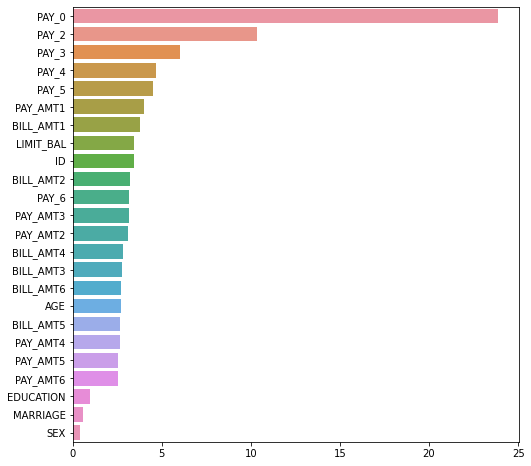

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

In [62]:
#filtering the important featres
main_features=feature_scores.loc[feature_scores >2]
main_features

PAY_0        23.860147
PAY_2        10.366742
PAY_3         6.003519
PAY_4         4.681273
PAY_5         4.480228
PAY_AMT1      4.006143
BILL_AMT1     3.777272
LIMIT_BAL     3.450235
ID            3.424564
BILL_AMT2     3.188707
PAY_6         3.173327
PAY_AMT3      3.144318
PAY_AMT2      3.093469
BILL_AMT4     2.795706
BILL_AMT3     2.789231
BILL_AMT6     2.732520
AGE           2.687930
BILL_AMT5     2.671851
PAY_AMT4      2.652816
PAY_AMT5      2.539845
PAY_AMT6      2.521066
dtype: float64

Training the best model with feature importance

In [63]:
x=data[main_features.index]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2, random_state=20)

In [65]:
randomforest=RandomForestClassifier(max_depth=10,n_estimators=250,random_state=134)
#fitting the model
randomforest.fit(x_train,y_train)
#predicting the target value
y_pred=randomforest.predict(x_test)

In [66]:
#finding the score of the model
rf_score=randomforest.score(x_test,y_test)
print('Random Forest Model score is :',rf_score*100,'%')

Random Forest Model score is : 82.28333333333333 %
